# Predictive Maintenance Dataset
Dataset by kaggle (https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?resource=download)<br>
Notebook by Tobias Kessel (https://www.linkedin.com/in/tobias-kessel-045806b5/)

__The dataset consists of 10 000 data points stored as rows with 14 features in columns__
***
* UID: unique identifier ranging from 1 to 10000
* productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
*air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
*process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air *temperature plus 10 K.
*rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
*torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
*tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
***
__Important : There are two Targets__

* Target : Failure or Not
* Failure Type : Type of Failure
***

# __Step 1:__ 
Importing libraries and first data assessment

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('predictive_maintenance.csv')

In [65]:
(df['UDI'] == df.index).sum()

10000

In [67]:
df.set_index('UDI',inplace=True)

In [69]:
df.head(10)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [76]:
df.select_dtypes(include=['float64','int64'])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,,,,,,
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0


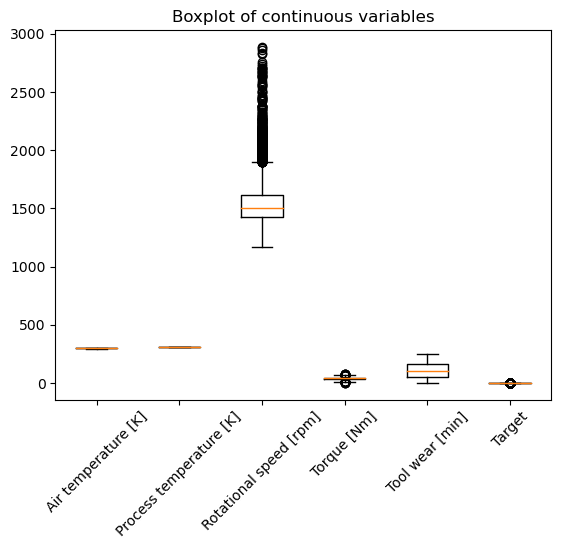

In [79]:
plt.boxplot(df.select_dtypes(include=['float64','int64']),labels=df.select_dtypes(include=['float64','int64']).columns)
plt.title('Boxplot of continuous variables')
plt.xticks(rotation=45);

In [15]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

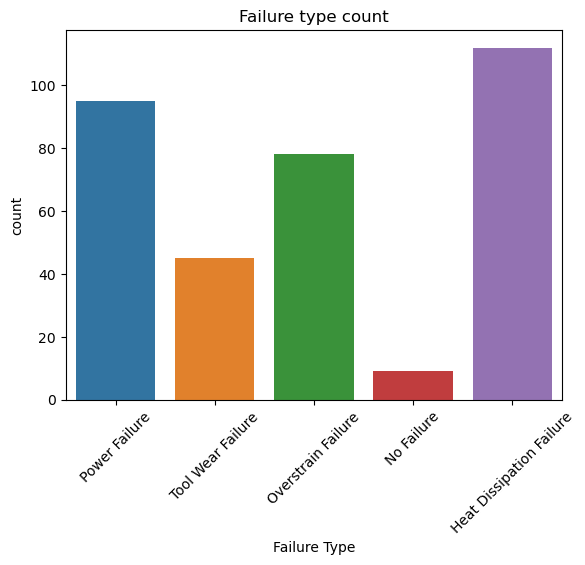

In [50]:
sns.countplot(x='Failure Type',data=df[df['Target']==1])
plt.title('Failure type count')
plt.xticks(rotation=45);

In [51]:
df['Failure Type'].value_counts(normalize=True)

No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: Failure Type, dtype: float64

In [84]:
print('Amount of total failures: {}'.format(df['Target'].sum()))

Amount of total failures: 339


In [85]:
print('Failed to non failed ratio: {}%'.format(100*df['Target'].sum()/df.shape[0]))

Failed to non failed ratio: 3.39%
